In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Veri setinin yüklenmesi

In [11]:
df = pd.read_csv("/workspace/DeepLearningFundamentals/Dokumanlar/02_MachineLearning/data/diabetes.csv")

#### Veri Setini Keşfedelim

head and tail

info

describe

#### Boş verilerin temizlenmesi (Handling Missing Data)

boş verilerin tespit edilmesi

In [12]:
# BMI
columnName = "BMI"
df[columnName] = df[columnName].replace(value=df[columnName].mean(),to_replace=0)
# BloodPressure
columnName = "BloodPressure"
df[columnName] = df[columnName].replace(value=df[columnName].mean(),to_replace=0)
# Insulin
columnName = "Insulin"
df[columnName] = df[columnName].replace(value=df[columnName].mean(),to_replace=0)
# Glucose
columnName = "Glucose"
df[columnName] = df[columnName].replace(value=df[columnName].mean(),to_replace=0)
# SkinThickness
columnName = "SkinThickness"
df[columnName] = df[columnName].replace(value=df[columnName].mean(),to_replace=0)

boşverilerin temizlenmesi (Boş veri Yok ise boş geçilebilir)

#### Kategorik verilerin dönüştürülmesi (Encoding Data)

Veri Tiplerinin Tespiti

Verilerin Dönüştürülmesi (Yok ise boş geçilebilir)

#### Aykırı Verilerin Tespiti


Verilerin dağılım grafiği ile tespit edilmesi

Verilerin IQR yöntemi ile tespit edilip kaldırılması

In [13]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    return df[~((df<Lower_tail) | (df>Upper_tail)).any(axis=1)]
    # df2 = df[~df.isin("aykırıdeğerler")].dropna()
df_clean = iqr_outliers(df)

<Axes: >

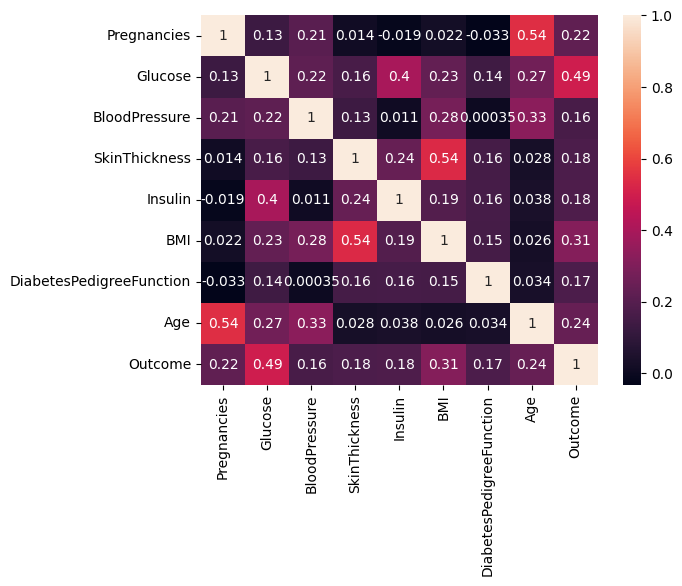

In [14]:
corr = df.corr()
import seaborn as sns
sns.heatmap(corr,annot=True)

#### Etiket Verisi varsa veri setinden ayrılması

In [15]:
y= df_clean["Outcome"].values
X= df_clean.drop("Outcome",axis=1)

#### Eğitim ve Test Setinin Birbirinden Ayrılması

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

#### Veri Ölçeklendirme işleminin gerçekleştirilmesi

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled =  sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [18]:
from sklearn.model_selection import KFold
kfold = KFold(5,shuffle=True)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_scaled,y_train)
y_preds = model.predict(X_test_scaled)
model.score(X_test_scaled,y_test)

0.7338709677419355

In [13]:
y_test

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [20]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import KNeighborsClassifier
kfold = KFold(n_splits=5,shuffle=True)
model = KNeighborsClassifier()
cross_val_score(model,X_train_scaled,y_train,cv=kfold)

array([0.76      , 0.75757576, 0.6969697 , 0.76767677, 0.73737374])

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

In [23]:
seed = 7
result = []
names = []
models = []
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVC',SVC()))
models.append(('LSVC',LinearSVC()))
models.append(('RFC',RandomForestClassifier()))
models.append(('DTR',DecisionTreeRegressor()))
models

[('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('NB', GaussianNB()),
 ('SVC', SVC()),
 ('LSVC', LinearSVC()),
 ('RFC', RandomForestClassifier()),
 ('DTR', DecisionTreeRegressor())]

In [24]:
import warnings
warnings.filterwarnings("ignore")
for name,model in models:
    kfold = KFold(n_splits=3,random_state=7,shuffle=True)
    cv_results = cross_val_score(model,X_train_scaled,y_train,cv=kfold,scoring="accuracy")
    result.append(cv_results)
    names.append(name)
    msg = f"{name} {cv_results.mean()} {cv_results.std()}"
    print(msg)

LR 0.7822928075940124 0.025384019479318926
KNN 0.7621151271753682 0.018477078079614774
NB 0.7661555312157722 0.011894199919319559
SVC 0.764171838870634 0.020817758525562384
LSVC 0.7863210417427284 0.022536089630146458
RFC 0.7641474990872581 0.014223974485373705
DTR 0.7036509675063892 0.012535354711545158


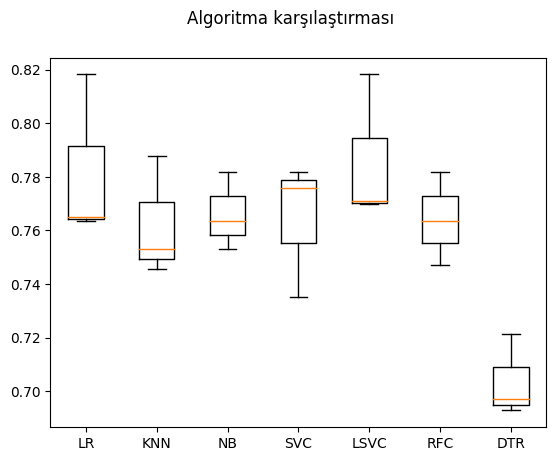

In [25]:
fig = plt.figure()
fig.suptitle("Algoritma karşılaştırması")
ax = fig.add_subplot(111)
plt.boxplot(result)
ax.set_xticklabels(names)
plt.show()

In [26]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
param_grid = {
    'C':[1.0,10.0],
    'kernel':['linear','rbf','poly',],
    # 'shrinking':[True,False],
    'gamma':['auto',1,0.1],
    # 'coef0':[0.0,0.1,0.5]
}

model_svc = SVC()
grid_search = GridSearchCV(model_svc,param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0, 10.0], 'gamma': ['auto', 1, 0.1],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [31]:
grid_search.best_score_

0.7721010101010102

In [33]:
grid_search.best_params_

{'C': 10.0, 'gamma': 'auto', 'kernel': 'linear'}

In [34]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
param_grid = {
    'C':[1.0,10.0,50.0],
    'kernel':['linear','rbf','poly','sigmoid'],
    'shrinking':[True,False],
    'gamma':['auto',1,0.1],
    'coef0':[0.0,0.1,0.5]
}

model_svc = SVC()
rnd_search = RandomizedSearchCV(model_svc,param_grid,cv=5,scoring='accuracy')
rnd_search.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1.0, 10.0, 50.0],
                                        'coef0': [0.0, 0.1, 0.5],
                                        'gamma': ['auto', 1, 0.1],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid'],
                                        'shrinking': [True, False]},
                   scoring='accuracy')

In [35]:
rnd_search.best_params_

{'shrinking': True, 'kernel': 'linear', 'gamma': 1, 'coef0': 0.0, 'C': 1.0}

In [36]:
rnd_search.best_score_

0.7700808080808081

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

In [38]:
model = SVC(shrinking=True, kernel= 'linear', gamma= 0.1, coef0= 0.1, C= 50.0)
model.fit(X_train_scaled,y_train)

SVC(C=50.0, coef0=0.1, gamma=0.1, kernel='linear')

In [39]:
y_preds =  model.predict(X_test_scaled)

In [40]:
confusion_matrix(y_test,y_preds)

array([[79,  6],
       [18, 21]])

<Axes: >

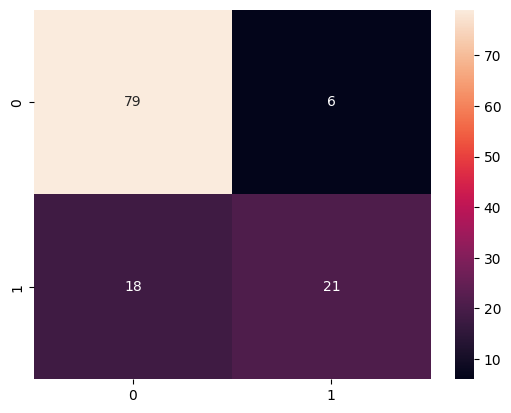

In [41]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_preds),annot=True)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        85
           1       0.78      0.54      0.64        39

    accuracy                           0.81       124
   macro avg       0.80      0.73      0.75       124
weighted avg       0.80      0.81      0.80       124

